In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import json
from zipfile import ZipFile
import matplotlib.image as mpimg
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers,models


In [2]:
!pip install kaggle

In [3]:
kaggle_json_path=json.load(open('/content/kaggle (4).json'))

In [4]:
os.environ['KAGGLE_USERNAME']=kaggle_json_path['username']
os.environ['KAGGLE_KEY']=kaggle_json_path['key']

In [5]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 94% 140M/149M [00:01<00:00, 143MB/s]
100% 149M/149M [00:01<00:00, 139MB/s]


In [6]:
with ZipFile('/content/brain-tumor-mri-dataset.zip','r') as zip:
  zip.extractall()

In [7]:
print(os.listdir('/content/Testing'))

['meningioma', 'glioma', 'notumor', 'pituitary']


In [8]:
print(os.listdir('/content/Training'))

['meningioma', 'glioma', 'notumor', 'pituitary']


In [9]:
print(os.listdir('/content/Testing/glioma'))

['Te-gl_0265.jpg', 'Te-gl_0257.jpg', 'Te-gl_0039.jpg', 'Te-gl_0209.jpg', 'Te-gl_0067.jpg', 'Te-gl_0036.jpg', 'Te-gl_0022.jpg', 'Te-gl_0266.jpg', 'Te-gl_0093.jpg', 'Te-gl_0106.jpg', 'Te-gl_0058.jpg', 'Te-gl_0116.jpg', 'Te-gl_0172.jpg', 'Te-gl_0190.jpg', 'Te-gl_0165.jpg', 'Te-gl_0271.jpg', 'Te-gl_0289.jpg', 'Te-gl_0072.jpg', 'Te-gl_0194.jpg', 'Te-gl_0284.jpg', 'Te-glTr_0007.jpg', 'Te-gl_0130.jpg', 'Te-gl_0218.jpg', 'Te-gl_0162.jpg', 'Te-gl_0214.jpg', 'Te-gl_0081.jpg', 'Te-gl_0025.jpg', 'Te-gl_0174.jpg', 'Te-gl_0228.jpg', 'Te-gl_0127.jpg', 'Te-gl_0045.jpg', 'Te-gl_0204.jpg', 'Te-gl_0208.jpg', 'Te-gl_0085.jpg', 'Te-gl_0210.jpg', 'Te-gl_0212.jpg', 'Te-gl_0073.jpg', 'Te-gl_0200.jpg', 'Te-glTr_0008.jpg', 'Te-gl_0024.jpg', 'Te-gl_0166.jpg', 'Te-gl_0032.jpg', 'Te-gl_0122.jpg', 'Te-gl_0051.jpg', 'Te-gl_0054.jpg', 'Te-gl_0294.jpg', 'Te-gl_0115.jpg', 'Te-gl_0108.jpg', 'Te-gl_0232.jpg', 'Te-gl_0285.jpg', 'Te-gl_0125.jpg', 'Te-glTr_0004.jpg', 'Te-gl_0068.jpg', 'Te-gl_0169.jpg', 'Te-gl_0291.jpg', 'Te

In [10]:
print(len(os.listdir('/content/Testing/glioma')))

300


In [11]:
print(len(os.listdir('/content/Training/glioma')))

1321


In [12]:
print(len(os.listdir('/content/Training/glioma')))
print(len(os.listdir('/content/Training/meningioma')))
print(len(os.listdir('/content/Training/notumor')))
print(len(os.listdir('/content/Training/pituitary')))

1321
1339
1595
1457


In [ ]:
print(len(os.listdir('/content/Testing/glioma')))
print(len(os.listdir('/content/Testing/meningioma')))
print(len(os.listdir('/content/Testing/notumor')))
print(len(os.listdir('/content/Testing/pituitary')))


300
306
405
300


In [ ]:
print(len(os.listdir('/content/Training')))

4


In [ ]:
train_data='/content/Training'

In [ ]:
print(len(train_data))

17


In [ ]:
test_data='/content/Testing'

In [ ]:
print(len(test_data))

16


In [ ]:
type(train_data)

str

In [ ]:
type(test_data)

str

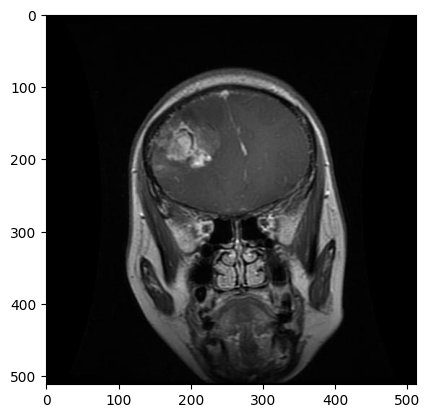

In [ ]:
train_image='/content/Training/glioma/Tr-glTr_0000.jpg'
img=mpimg.imread(train_image)
plt.imshow(img)
plt.show()

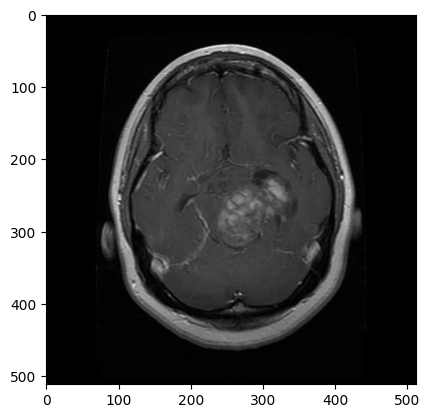

In [ ]:
train_image='/content/Training/glioma/Tr-gl_0083.jpg'
img=mpimg.imread(train_image)
plt.imshow(img)
plt.show()

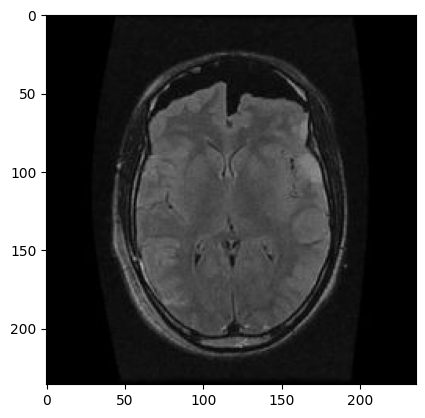

In [ ]:
test_image='/content/Testing/notumor/Te-no_0018.jpg'
img=mpimg.imread(test_image)

plt.imshow(img)
plt.show()

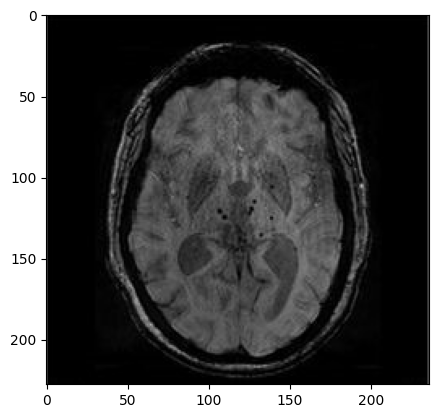

[[[110 110 110]
  [ 32  32  32]
  [ 34  34  34]
  ...
  [ 33  33  33]
  [ 32  32  32]
  [105 105 105]]

 [[ 78  78  78]
  [  0   0   0]
  [  2   2   2]
  ...
  [  3   3   3]
  [  1   1   1]
  [ 75  75  75]]

 [[ 77  77  77]
  [  0   0   0]
  [  0   0   0]
  ...
  [  2   2   2]
  [  1   1   1]
  [ 76  76  76]]

 ...

 [[ 81  81  81]
  [  2   2   2]
  [  2   2   2]
  ...
  [  4   4   4]
  [  4   4   4]
  [ 79  79  79]]

 [[ 81  81  81]
  [  2   2   2]
  [  1   1   1]
  ...
  [  2   2   2]
  [  3   3   3]
  [ 79  79  79]]

 [[ 80  80  80]
  [  1   1   1]
  [  1   1   1]
  ...
  [  1   1   1]
  [  2   2   2]
  [ 78  78  78]]]


In [ ]:
test_image='/content/Testing/notumor/Te-no_0026.jpg'
img=mpimg.imread(test_image)
plt.imshow(img)
plt.show()
print(img)

In [ ]:
type(img)


numpy.ndarray

In [ ]:
img.shape

(228, 236, 3)

In [ ]:

img.ndim

3

In [ ]:
img_size=256
batch_size=32

Data Augmentation


In [ ]:
from sklearn.preprocessing import LabelEncoder
from skimage.transform import resize

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory


In [ ]:
train_ds = image_dataset_from_directory(
    '/content/Training',
    # label_mode='int',
    shuffle=True,
    label_mode='categorical',
    seed=123,
    image_size=(img_size,img_size),
    batch_size=32
)

test_ds = image_dataset_from_directory(
    '/content/Testing',
    # label_mode='int',
    shuffle=True,
    label_mode='categorical',
    seed=123,
    image_size=(img_size,img_size),
    batch_size=32
)

for x, y in train_ds.take(1):
  print(x.shape, y.shape)

for x, y in test_ds.take(1):
  print(x.shape, y.shape)

Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.
(32, 256, 256, 3) (32, 4)
(32, 256, 256, 3) (32, 4)


In [32]:
class_names = train_ds.class_names
print(class_names)

['glioma', 'meningioma', 'notumor', 'pituitary']


In [ ]:
print('Number of training batches: %d' % tf.data.experimental.cardinality(train_ds).numpy())
print('Number of testing batches: %d' % tf.data.experimental.cardinality(test_ds).numpy())

Number of training batches: 179
Number of testing batches: 41


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
normalized_test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.09570702 0.99852175


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size,img_size, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 246016)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │     125,960,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 126,054,276 (480.86 MB)

 Trainable params: 126,054,276 (480.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
score = model.evaluate(normalized_test_ds, verbose=False)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.3850444555282593
Test accuracy: 0.25476735830307007
Test loss: 1.3850444555282593
Test accuracy: 0.25476735830307007


Transfer learning


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Freeze the base model layers
base_model.trainable = False

# Create a new model on top
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(4, activation='softmax'))  # 4 output classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()



Unet


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, concatenate, UpSampling2D, Dense


def unet(input_size=(256,256, 3)):
    inputs = Input(input_size)

    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)
    pool5 = MaxPooling2D(pool_size=(2, 2))(conv5)

    conv6 = Conv2D(2048, 3, activation='relu', padding='same')(pool5)  # Define conv6
    conv6 = Conv2D(2048, 3, activation='relu', padding='same')(conv6)


    # Decoder
    up7 = UpSampling2D(size=(2, 2))(conv6)
    merge7 = concatenate([conv5, up7], axis=3)
    conv7 = Conv2D(1024, 3, activation='relu', padding='same')(merge7) #adjust the number of filters
    conv7 = Conv2D(1024, 3, activation='relu', padding='same')(conv7) #adjust the number of filters

    up8 = UpSampling2D(size=(2, 2))(conv7)
    merge8 = concatenate([conv4, up8], axis=3)
    conv8 = Conv2D(512, 3, activation='relu', padding='same')(merge8) #adjust the number of filters
    conv8 = Conv2D(512, 3, activation='relu', padding='same')(conv8) #adjust the number of filters

    up9 = UpSampling2D(size=(2, 2))(conv8)
    merge9 = concatenate([conv3, up9], axis=3)
    conv9 = Conv2D(256, 3, activation='relu', padding='same')(merge9) #adjust the number of filters
    conv9 = Conv2D(256, 3, activation='relu', padding='same')(conv9) #adjust the number of filters

    up10 = UpSampling2D(size=(2, 2))(conv9)
    merge10 = concatenate([conv2, up10])
    flatten = tf.keras.layers.Flatten()(conv9) # Flatten the output of the last convolutional layer
    outputs = Dense(4, activation='softmax')(flatten)  # 4 output classes with softmax activation

    model1 = Model(inputs=[inputs], outputs=[outputs])
    return model1
model1 = unet()

model1.summary()


In [ ]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#history1=model1.fit(
    #normalized_ds,
    #validation_data=normalized_test_ds,
    #epochs=1
#)

Random Forest


In [ ]:
import numpy as np

# Extract features and labels for training data
X_train = []
y_train = []
for images, labels in normalized_ds:
    for i in range(images.shape[0]):
        X_train.append(images[i].numpy().flatten())  # Flatten image data
        y_train.append(np.argmax(labels[i].numpy()))  # Get class index

X_train = np.array(X_train)
y_train = np.array(y_train)

# Extract features and labels for testing data
X_test = []
y_test = []
for images, labels in normalized_test_ds:
    for i in range(images.shape[0]):
        X_test.append(images[i].numpy().flatten())
        y_test.append(np.argmax(labels[i].numpy()))

X_test = np.array(X_test)
y_test = np.array(y_test)

3D CNN Model


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense

In [ ]:
model2 = Sequential()
# add padding='same' to keep the output shape the same as the input shape in the depth dimension
model2.add(Conv3D(32, (3, 3, 3), activation='relu', input_shape=(img_size, img_size, 1, 3), padding='same'))
model2.add(MaxPooling3D((2, 2, 1)))
model2.add(Conv3D(64, (3, 3, 3), activation='relu', padding='same'))
model2.add(MaxPooling3D((2, 2, 1)))
model2.add(Conv3D(128, (3, 3, 3), activation='relu', padding='same'))
model2.add(MaxPooling3D((2, 2, 1)))
model2.add(Conv3D(256, (3, 3, 3), activation='relu', padding='same'))
model2.add(MaxPooling3D((2, 2, 1)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(4, activation='softmax'))  # 4 output classes

In [ ]:
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from zipfile import ZipFile



In [ ]:
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from zipfile import ZipFile

glioma_data = '/content/Training/glioma'  # Path to the directory containing images

# Get a list of all image files in the directory
image_files_glioma= [f for f in os.listdir(glioma_data) if os.path.isfile(os.path.join(glioma_data, f))]

# Calculate the number of images
num_images_glioma = len(image_files_glioma)
print(f"Number of images in the directory: {num_images_glioma}")

# Read and display the first image (you can modify this to loop through all images)
if image_files_glioma:
    img_path = os.path.join(glioma_data, image_files_glioma[999])
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.show()
else:
    print("No image files found in the directory.")


In [ ]:
notumor_data='/content/Training/notumor'

image_files_notumor_data= [f for f in os.listdir(notumor_data) if os.path.isfile(os.path.join(notumor_data, f))]

# Calculate the number of images
num_images_notumor = len(image_files_notumor_data)
print(f"Number of images in the directory: {num_images_notumor}")

# Read and display the first image (you can modify this to loop through all images)
if image_files_notumor_data:
    img_path = os.path.join(notumor_data,
image_files_notumor_data[999])
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.show()
else:
    print("No image files found in the directory.")


In [ ]:
print(len(image_files_glioma))
print(len(image_files_notumor_data))


In [ ]:
meningioma='/content/Training/meningioma'

image_files_meningioma= [f for f in os.listdir(meningioma) if os.path.isfile(os.path.join(meningioma, f))]

# Calculate the number of images
num_images_meningioma = len(image_files_meningioma)
print(f"Number of images in the directory: {num_images_meningioma}")

# Read and display the first image (you can modify this to loop through all images)
if image_files_meningioma:
    img_path = os.path.join(meningioma, image_files_meningioma[999])
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.show()
else:
    print("No image files found in the directory.")

data of pituitary

In [ ]:
pituitary='/content/Training/pituitary'

image_files_pituitary= [f for f in os.listdir(pituitary) if os.path.isfile(os.path.join(pituitary, f))]

# Calculate the number of images
num_images_pituitary = len(image_files_pituitary)
print(f"Number of images in the directory: {num_images_pituitary}")

# Read and display the first image (you can modify this to loop through all images)
if image_files_pituitary:
    img_path = os.path.join(pituitary, image_files_pituitary[999])
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.show()
else:
    print("No image files found in the directory.")

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout, LeakyReLU, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
import numpy as np

In [ ]:
no_of_glioma=len(image_files_glioma)
print(no_of_glioma)

Notumor

In [ ]:
NOISE_DIM = 100
BATCH_SIZE = 4
STEPS_PER_EPOCH =num_images_notumor// BATCH_SIZE
EPOCHS = 20
SEED = 40
WIDTH, HEIGHT, CHANNELS = 128, 128, 1

OPTIMIZER = Adam(0.0002, 0.5)
print(STEPS_PER_EPOCH)

In [ ]:
np.random.seed(SEED)
idxs = np.random.randint(0, 155, 20)

In [ ]:
import os

orgin_path = '/content/Training/notumor'
print("Files in directory:")
print(os.listdir(orgin_path))
print(len(orgin_path))
print("Number of files:", len(os.listdir(orgin_path)))

In [ ]:
import numpy as np
from PIL import Image
import os

# Assuming image_files_glioma is your list of image file paths
# and idxs is your NumPy array of indices

# Convert the list to a NumPy array first
image_files_notumor_data_np= np.array(image_files_notumor_data)

# Use idxs to get paths
X_train_paths =image_files_notumor_data_np[idxs]

# Initialize an empty list to store image data
X_train = []


orgin_path = '/content/Training/notumor'

# Load and preprocess each image
for path in X_train_paths:
    absolute_path = os.path.join(orgin_path, path)
    print(f"Checking path: {absolute_path}")  # Debugging line

    # Check if file exists
    if os.path.exists(absolute_path):
        image = Image.open(absolute_path).convert('L')  # Convert to grayscale
        image = image.resize((WIDTH, HEIGHT))  # Resize image
        image_np = np.array(image)  # Convert to NumPy array

        # Normalize and append to X_train
        X_train.append((image_np.astype(np.float32) - 127.5) / 127.5)
    else:
        print(f"Warning: File not found: {absolute_path}")

# Convert X_train to a NumPy array
X_train = np.array(X_train)

# Check the shape before reshaping
print("Shape before reshaping:", X_train.shape)

# Reshape images if necessary
if X_train.size > 0:  # Check if there are any images loaded
    X_train = X_train.reshape(-1, WIDTH, HEIGHT, CHANNELS)

# Check final shape
print("Final shape of X_train:", X_train.shape)
print(len(X_train))



In [ ]:

plt.figure(figsize=(20,8))
for i in range(10):
    axs = plt.subplot(2,5,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
    axs.set_xticklabels([])
    axs.set_yticklabels([])
    plt.subplots_adjust(wspace=None, hspace=None)
plt.tight_layout()

In [ ]:
NOISE_DIM = 100
BATCH_SIZE = 4
STEPS_PER_EPOCH =num_images_pituitary // BATCH_SIZE
EPOCHS = 20
SEED = 40
WIDTH, HEIGHT, CHANNELS = 128, 128, 1

OPTIMIZER = Adam(0.0002, 0.5)
print(STEPS_PER_EPOCH)

In [ ]:
np.random.seed(SEED)
idxs = np.random.randint(0, 155, 20)

In [ ]:
type(image_files_pituitary)

In [ ]:
import os

orgi_path = '/content/Training/pituitary'
print("Files in directory:")
print(os.listdir(orgi_path))
print(len(orgi_path))
print("Number of files:", len(os.listdir(orgi_path)))

In [ ]:
import numpy as np
from PIL import Image
import os

# Assuming image_files_glioma is your list of image file paths
# and idxs is your NumPy array of indices

# Convert the list to a NumPy array first
image_files_pituitary_np= np.array(image_files_pituitary)

# Use idxs to get paths
X_train_paths =image_files_pituitary_np[idxs]

# Initialize an empty list to store image data
X_train = []


orgi_path = '/content/Training/pituitary'

# Load and preprocess each image
for path in X_train_paths:
    absolute_path = os.path.join(orgi_path, path)
    print(f"Checking path: {absolute_path}")  # Debugging line

    # Check if file exists
    if os.path.exists(absolute_path):
        image = Image.open(absolute_path).convert('L')  # Convert to grayscale
        image = image.resize((WIDTH, HEIGHT))  # Resize image
        image_np = np.array(image)  # Convert to NumPy array

        # Normalize and append to X_train
        X_train.append((image_np.astype(np.float32) - 127.5) / 127.5)
    else:
        print(f"Warning: File not found: {absolute_path}")

# Convert X_train to a NumPy array
X_train = np.array(X_train)

# Check the shape before reshaping
print("Shape before reshaping:", X_train.shape)

# Reshape images if necessary
if X_train.size > 0:  # Check if there are any images loaded
    X_train = X_train.reshape(-1, WIDTH, HEIGHT, CHANNELS)

# Check final shape
print("Final shape of X_train:", X_train.shape)
print(len(X_train))



In [ ]:
plt.figure(figsize=(20,8))
for i in range(10):
    axs = plt.subplot(2,5,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
    axs.set_xticklabels([])
    axs.set_yticklabels([])
    plt.subplots_adjust(wspace=None, hspace=None)
plt.tight_layout()

In [ ]:
def build_generator():



    model = Sequential([

        Dense(32*32*256, input_dim=NOISE_DIM),
        LeakyReLU(alpha=0.2),
        Reshape((32,32,256)),

        Conv2DTranspose(128, (4, 4), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        Conv2DTranspose(128, (4, 4), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        Conv2D(CHANNELS, (4, 4), padding='same', activation='tanh')
    ],
    name="generator")
    model.summary()
    model.compile(loss="binary_crossentropy", optimizer=OPTIMIZER)

    return model

In [ ]:
def build_discriminator():



    model = Sequential([

        Conv2D(64, (3, 3), padding='same', input_shape=(WIDTH, HEIGHT, CHANNELS)),
        LeakyReLU(alpha=0.2),

        Conv2D(128, (3, 3), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        Conv2D(128, (3, 3), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        Conv2D(256, (3, 3), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        Flatten(),
        Dropout(0.4),
        Dense(1, activation="sigmoid", input_shape=(WIDTH, HEIGHT, CHANNELS))
    ], name="discriminator")
    model.summary()
    model.compile(loss="binary_crossentropy",
                        optimizer=OPTIMIZER)

    return model

In [ ]:
print('\n')
discriminator = build_discriminator()
print('\n')
generator = build_generator()

#discriminator.trainable = False

gan_input = Input(shape=(NOISE_DIM,))
fake_image = generator(gan_input)

gan_output = discriminator(fake_image)

gan = Model(gan_input, gan_output, name="gan_model")

# Import the LegacyAdam optimizer
from tensorflow.keras.optimizers import Adam

# Create a new LegacyAdam optimizer instance

optimizer = Adam(learning_rate=0.0002)
# Access trainable variables to ensure they are recognized (workaround)
_ = gan.trainable_variables # This line is the key to the workaround.

# Compile the GAN model using the optimizer
gan.compile(loss="binary_crossentropy", optimizer=optimizer)

print("The Combined Network:\n")
gan.summary()

In [ ]:
def sample_images(noise, subplots, figsize=(22,8), save=False):
    generated_images = generator.predict(noise)
    plt.figure(figsize=figsize)

    for i, image in enumerate(generated_images):
        plt.subplot(subplots[0], subplots[1], i+1)
        if CHANNELS == 1:
            plt.imshow(image.reshape((WIDTH, HEIGHT)), cmap='gray')

        else:
            plt.imshow(image.reshape((WIDTH, HEIGHT, CHANNELS)))
        if save == True:
            img_name = "gen" + str(i)
            plt.savefig(img_name)
        plt.subplots_adjust(wspace=None, hspace=None)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
from tensorflow.keras.optimizers.legacy import Adam
optimizer = Adam(learning_rate=0.0002)
discriminator = build_discriminator()
generator = build_generator()
discriminator.compile(loss="binary_crossentropy", optimizer=optimizer)
gan_input = Input(shape=(NOISE_DIM,))
fake_image = generator(gan_input)
gan_output = discriminator(fake_image)

gan = Model(gan_input, gan_output, name="gan_model")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer=optimizer)

print("The Combined Network:\n")
gan.summary()

In [ ]:
!pip install tqdm
from tqdm import tqdm

In [ ]:
# Import the LegacyAdam optimizer
from tensorflow.keras.optimizers.legacy import Adam

# Create a new LegacyAdam optimizer instance
optimizer = Adam(learning_rate=0.0002)

# Build the models
discriminator = build_discriminator()
generator = build_generator()

# Compile the discriminator
discriminator.compile(loss="binary_crossentropy", optimizer=optimizer)

# Build the GAN model
gan_input = Input(shape=(NOISE_DIM,))
fake_image = generator(gan_input)
gan_output = discriminator(fake_image)

gan = Model(gan_input, gan_output, name="gan_model")

# When compiling the GAN, set discriminator as non-trainable to freeze its weights
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer=optimizer)

print("The Combined Network:\n")
gan.summary()

# Training loop
np.random.seed(SEED)
for epoch in range(10):
    for batch in tqdm(range(STEPS_PER_EPOCH)):

        # Generate random noise for fake images
        noise = np.random.normal(0, 1, size=(BATCH_SIZE, NOISE_DIM))
        fake_X = generator.predict(noise)

        # Sample a random batch of real images
        idx = np.random.randint(0, X_train.shape[0], size=BATCH_SIZE)
        real_X = X_train[idx]

        # Concatenate fake and real images for discriminator training
        X = np.concatenate((real_X, fake_X))

        # Create labels: real = 1, fake = 0
        disc_y = np.zeros(2 * BATCH_SIZE)
        disc_y[:BATCH_SIZE] = 1

        # Train the discriminator
        discriminator.trainable = True  # Make discriminator trainable
        d_loss = discriminator.train_on_batch(X, disc_y)

        # Train the generator (discriminator frozen during generator training)
        discriminator.trainable = False  # Freeze discriminator
        noise = np.random.normal(0, 1, size=(BATCH_SIZE, NOISE_DIM))
        y_gen = np.ones(BATCH_SIZE)  # Generator wants discriminator to output 1 for fake images
        g_loss = gan.train_on_batch(noise, y_gen)

    print(f"EPOCH: {epoch + 1} Generator Loss: {g_loss:.4f} Discriminator Loss: {d_loss:.4f}")
    noise = np.random.normal(0, 1, size=(10, NOISE_DIM))
    sample_images(noise, (2, 5))


meningioma

In [ ]:
NOISE_DIM = 100
BATCH_SIZE = 4
STEPS_PER_EPOCH =no_images_meningioma // BATCH_SIZE
EPOCHS = 20
SEED = 40
WIDTH, HEIGHT, CHANNELS = 128, 128, 1

OPTIMIZER = Adam(0.0002, 0.5)
print(STEPS_PER_EPOCH)

In [ ]:
np.random.seed(SEED)
idxs = np.random.randint(0, 155, 20)

In [ ]:
type(image_files_meningioma)

In [ ]:
import os

org_path = '/content/Training/meningioma'
print("Files in directory:")
print(os.listdir(org_path))
print(len(org_path))
print("Number of files:", len(os.listdir(org_path)))

In [ ]:
import numpy as np
from PIL import Image
import os

# Assuming image_files_glioma is your list of image file paths
# and idxs is your NumPy array of indices

# Convert the list to a NumPy array first
image_files_meningioma_np= np.array(image_files_meningioma)

# Use idxs to get paths
X_train_paths =image_files_meningioma_np[idxs]

# Initialize an empty list to store image data
X_train = []

org_path = '/content/Training/meningioma'

# Load and preprocess each image
for path in X_train_paths:
    absolute_path = os.path.join(org_path, path)
    print(f"Checking path: {absolute_path}")  # Debugging line

    # Check if file exists
    if os.path.exists(absolute_path):
        image = Image.open(absolute_path).convert('L')  # Convert to grayscale
        image = image.resize((WIDTH, HEIGHT))  # Resize image
        image_np = np.array(image)  # Convert to NumPy array

        # Normalize and append to X_train
        X_train.append((image_np.astype(np.float32) - 127.5) / 127.5)
    else:
        print(f"Warning: File not found: {absolute_path}")

# Convert X_train to a NumPy array
X_train = np.array(X_train)

# Check the shape before reshaping
print("Shape before reshaping:", X_train.shape)

# Reshape images if necessary
if X_train.size > 0:  # Check if there are any images loaded
    X_train = X_train.reshape(-1, WIDTH, HEIGHT, CHANNELS)

# Check final shape
print("Final shape of X_train:", X_train.shape)
print(len(X_train))



In [ ]:
plt.figure(figsize=(20,8))
for i in range(10):
    axs = plt.subplot(2,5,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
    axs.set_xticklabels([])
    axs.set_yticklabels([])
    plt.subplots_adjust(wspace=None, hspace=None)
plt.tight_layout()

In [ ]:
def build_generator():



    model = Sequential([

        Dense(32*32*256, input_dim=NOISE_DIM),
        LeakyReLU(alpha=0.2),
        Reshape((32,32,256)),

        Conv2DTranspose(128, (4, 4), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        Conv2DTranspose(128, (4, 4), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        Conv2D(CHANNELS, (4, 4), padding='same', activation='tanh')
    ],
    name="generator")
    model.summary()
    model.compile(loss="binary_crossentropy", optimizer=OPTIMIZER)

    return model

In [ ]:
def build_discriminator():



    model = Sequential([

        Conv2D(64, (3, 3), padding='same', input_shape=(WIDTH, HEIGHT, CHANNELS)),
        LeakyReLU(alpha=0.2),

        Conv2D(128, (3, 3), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        Conv2D(128, (3, 3), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        Conv2D(256, (3, 3), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        Flatten(),
        Dropout(0.4),
        Dense(1, activation="sigmoid", input_shape=(WIDTH, HEIGHT, CHANNELS))
    ], name="discriminator")
    model.summary()
    model.compile(loss="binary_crossentropy",
                        optimizer=OPTIMIZER)

    return model

In [ ]:
def sample_images(noise, subplots, figsize=(22,8), save=False):
    generated_images = generator.predict(noise)
    plt.figure(figsize=figsize)

    for i, image in enumerate(generated_images):
        plt.subplot(subplots[0], subplots[1], i+1)
        if CHANNELS == 1:
            plt.imshow(image.reshape((WIDTH, HEIGHT)), cmap='gray')

        else:
            plt.imshow(image.reshape((WIDTH, HEIGHT, CHANNELS)))
        if save == True:
            img_name = "gen" + str(i)
            plt.savefig(img_name)
        plt.subplots_adjust(wspace=None, hspace=None)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
print('\n')
discriminator = build_discriminator()
print('\n')
generator = build_generator()

#discriminator.trainable = False

gan_input = Input(shape=(NOISE_DIM,))
fake_image = generator(gan_input)

gan_output = discriminator(fake_image)

gan = Model(gan_input, gan_output, name="gan_model")

# Import the LegacyAdam optimizer
from tensorflow.keras.optimizers import Adam

# Create a new LegacyAdam optimizer instance

optimizer = Adam(learning_rate=0.0002)
# Access trainable variables to ensure they are recognized (workaround)
_ = gan.trainable_variables # This line is the key to the workaround.

# Compile the GAN model using the optimizer
gan.compile(loss="binary_crossentropy", optimizer=optimizer)

print("The Combined Network:\n")
gan.summary()

In [ ]:
from tensorflow.keras.optimizers.legacy import Adam
optimizer = Adam(learning_rate=0.0002)
discriminator = build_discriminator()
generator = build_generator()
discriminator.compile(loss="binary_crossentropy", optimizer=optimizer)
gan_input = Input(shape=(NOISE_DIM,))
fake_image = generator(gan_input)
gan_output = discriminator(fake_image)

gan = Model(gan_input, gan_output, name="gan_model")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer=optimizer)

print("The Combined Network:\n")
gan.summary()

In [ ]:
!pip install tqdm
from

In [ ]:
# Import the LegacyAdam optimizer
from tensorflow.keras.optimizers.legacy import Adam

# Create a new LegacyAdam optimizer instance
optimizer = Adam(learning_rate=0.0002)

# Build the models
discriminator = build_discriminator()
generator = build_generator()

# Compile the discriminator
discriminator.compile(loss="binary_crossentropy", optimizer=optimizer)

# Build the GAN model
gan_input = Input(shape=(NOISE_DIM,))
fake_image = generator(gan_input)
gan_output = discriminator(fake_image)

gan = Model(gan_input, gan_output, name="gan_model")

# When compiling the GAN, set discriminator as non-trainable to freeze its weights
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer=optimizer)

print("The Combined Network:\n")
gan.summary()

# Training loop
np.random.seed(SEED)
for epoch in range(10):
    for batch in tqdm(range(STEPS_PER_EPOCH)):

        # Generate random noise for fake images
        noise = np.random.normal(0, 1, size=(BATCH_SIZE, NOISE_DIM))
        fake_X = generator.predict(noise)

        # Sample a random batch of real images
        idx = np.random.randint(0, X_train.shape[0], size=BATCH_SIZE)
        real_X = X_train[idx]

        # Concatenate fake and real images for discriminator training
        X = np.concatenate((real_X, fake_X))

        # Create labels: real = 1, fake = 0
        disc_y = np.zeros(2 * BATCH_SIZE)
        disc_y[:BATCH_SIZE] = 1

        # Train the discriminator
        discriminator.trainable = True  # Make discriminator trainable
        d_loss = discriminator.train_on_batch(X, disc_y)

        # Train the generator (discriminator frozen during generator training)
        discriminator.trainable = False  # Freeze discriminator
        noise = np.random.normal(0, 1, size=(BATCH_SIZE, NOISE_DIM))
        y_gen = np.ones(BATCH_SIZE)  # Generator wants discriminator to output 1 for fake images
        g_loss = gan.train_on_batch(noise, y_gen)

    print(f"EPOCH: {epoch + 1} Generator Loss: {g_loss:.4f} Discriminator Loss: {d_loss:.4f}")
    noise = np.random.normal(0, 1, size=(10, NOISE_DIM))
    sample_images(noise, (2, 5))


notumour

for glioma

In [ ]:
NOISE_DIM = 100
BATCH_SIZE = 4
STEPS_PER_EPOCH =num_images_glioma // BATCH_SIZE
EPOCHS = 20
SEED = 40
WIDTH, HEIGHT, CHANNELS = 128, 128, 1

OPTIMIZER = Adam(0.0002, 0.5)
print(STEPS_PER_EPOCH)

In [ ]:
np.random.seed(SEED)
idxs = np.random.randint(0, 155, 20)

In [ ]:
type(image_files_glioma)

In [ ]:
import os

base_path = '/content/Training/glioma'
print("Files in directory:")
print(os.listdir(base_path))
print(len(base_path))
print("Number of files:", len(os.listdir(base_path)))


In [ ]:
import numpy as np
from PIL import Image
import os

# Assuming image_files_glioma is your list of image file paths
# and idxs is your NumPy array of indices

# Convert the list to a NumPy array first
image_files_glioma_np = np.array(image_files_glioma)

# Use idxs to get paths
X_train_paths = image_files_glioma_np[idxs]

# Initialize an empty list to store image data
X_train = []

base_path = '/content/Training/glioma'

# Load and preprocess each image
for path in X_train_paths:
    absolute_path = os.path.join(base_path, path)
    print(f"Checking path: {absolute_path}")  # Debugging line

    # Check if file exists
    if os.path.exists(absolute_path):
        image = Image.open(absolute_path).convert('L')  # Convert to grayscale
        image = image.resize((WIDTH, HEIGHT))  # Resize image
        image_np = np.array(image)  # Convert to NumPy array

        # Normalize and append to X_train
        X_train.append((image_np.astype(np.float32) - 127.5) / 127.5)
    else:
        print(f"Warning: File not found: {absolute_path}")

# Convert X_train to a NumPy array
X_train = np.array(X_train)

# Check the shape before reshaping
print("Shape before reshaping:", X_train.shape)

# Reshape images if necessary
if X_train.size > 0:  # Check if there are any images loaded
    X_train = X_train.reshape(-1, WIDTH, HEIGHT, CHANNELS)

# Check final shape
print("Final shape of X_train:", X_train.shape)
print(len(X_train))



In [ ]:
plt.figure(figsize=(20,8))
for i in range(10):
    axs = plt.subplot(2,5,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
    axs.set_xticklabels([])
    axs.set_yticklabels([])
    plt.subplots_adjust(wspace=None, hspace=None)
plt.tight_layout()

In [ ]:
def build_generator():



    model = Sequential([

        Dense(32*32*256, input_dim=NOISE_DIM),
        LeakyReLU(alpha=0.2),
        Reshape((32,32,256)),

        Conv2DTranspose(128, (4, 4), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        Conv2DTranspose(128, (4, 4), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        Conv2D(CHANNELS, (4, 4), padding='same', activation='tanh')
    ],
    name="generator")
    model.summary()
    model.compile(loss="binary_crossentropy", optimizer=OPTIMIZER)

    return model


In [ ]:
def build_discriminator():



    model = Sequential([

        Conv2D(64, (3, 3), padding='same', input_shape=(WIDTH, HEIGHT, CHANNELS)),
        LeakyReLU(alpha=0.2),

        Conv2D(128, (3, 3), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        Conv2D(128, (3, 3), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        Conv2D(256, (3, 3), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        Flatten(),
        Dropout(0.4),
        Dense(1, activation="sigmoid", input_shape=(WIDTH, HEIGHT, CHANNELS))
    ], name="discriminator")
    model.summary()
    model.compile(loss="binary_crossentropy",
                        optimizer=OPTIMIZER)

    return model

In [ ]:
from tensorflow.keras.optimizers.legacy import Adam
optimizer = Adam(learning_rate=0.0002)
discriminator = build_discriminator()
generator = build_generator()
discriminator.compile(loss="binary_crossentropy", optimizer=optimizer)
gan_input = Input(shape=(NOISE_DIM,))
fake_image = generator(gan_input)
gan_output = discriminator(fake_image)

gan = Model(gan_input, gan_output, name="gan_model")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer=optimizer)

print("The Combined Network:\n")
gan.summary()

In [ ]:
print('\n')
discriminator = build_discriminator()
print('\n')
generator = build_generator()

#discriminator.trainable = False

gan_input = Input(shape=(NOISE_DIM,))
fake_image = generator(gan_input)

gan_output = discriminator(fake_image)

gan = Model(gan_input, gan_output, name="gan_model")

# Import the LegacyAdam optimizer
from tensorflow.keras.optimizers import Adam

# Create a new LegacyAdam optimizer instance

optimizer = Adam(learning_rate=0.0002)
# Access trainable variables to ensure they are recognized (workaround)
_ = gan.trainable_variables # This line is the key to the workaround.

# Compile the GAN model using the optimizer
gan.compile(loss="binary_crossentropy", optimizer=optimizer)

print("The Combined Network:\n")
gan.summary()

In [ ]:
def sample_images(noise, subplots, figsize=(22,8), save=False):
    generated_images = generator.predict(noise)
    plt.figure(figsize=figsize)

    for i, image in enumerate(generated_images):
        plt.subplot(subplots[0], subplots[1], i+1)
        if CHANNELS == 1:
            plt.imshow(image.reshape((WIDTH, HEIGHT)), cmap='gray')

        else:
            plt.imshow(image.reshape((WIDTH, HEIGHT, CHANNELS)))
        if save == True:
            img_name = "gen" + str(i)
            plt.savefig(img_name)
        plt.subplots_adjust(wspace=None, hspace=None)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
from tensorflow.keras.optimizers.legacy import Adam
optimizer = Adam(learning_rate=0.0002)
discriminator = build_discriminator()
generator = build_generator()
discriminator.compile(loss="binary_crossentropy", optimizer=optimizer)
gan_input = Input(shape=(NOISE_DIM,))
fake_image = generator(gan_input)
gan_output = discriminator(fake_image)

gan = Model(gan_input, gan_output, name="gan_model")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer=optimizer)

print("The Combined Network:\n")
gan.summary()

In [ ]:

!pip install tqdm
from tqdm import tqdm

In [ ]:
# Import the LegacyAdam optimizer
from tensorflow.keras.optimizers.legacy import Adam

# Create a new LegacyAdam optimizer instance
optimizer = Adam(learning_rate=0.0002)

# Build the models
discriminator = build_discriminator()
generator = build_generator()

# Compile the discriminator
discriminator.compile(loss="binary_crossentropy", optimizer=optimizer)

# Build the GAN model
gan_input = Input(shape=(NOISE_DIM,))
fake_image = generator(gan_input)
gan_output = discriminator(fake_image)

gan = Model(gan_input, gan_output, name="gan_model")

# When compiling the GAN, set discriminator as non-trainable to freeze its weights
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer=optimizer)

print("The Combined Network:\n")
gan.summary()

# Training loop
np.random.seed(SEED)
for epoch in range(10):
    for batch in tqdm(range(STEPS_PER_EPOCH)):

        # Generate random noise for fake images
        noise = np.random.normal(0, 1, size=(BATCH_SIZE, NOISE_DIM))
        fake_X = generator.predict(noise)

        # Sample a random batch of real images
        idx = np.random.randint(0, X_train.shape[0], size=BATCH_SIZE)
        real_X = X_train[idx]

        # Concatenate fake and real images for discriminator training
        X = np.concatenate((real_X, fake_X))

        # Create labels: real = 1, fake = 0
        disc_y = np.zeros(2 * BATCH_SIZE)
        disc_y[:BATCH_SIZE] = 1

        # Train the discriminator
        discriminator.trainable = True  # Make discriminator trainable
        d_loss = discriminator.train_on_batch(X, disc_y)

        # Train the generator (discriminator frozen during generator training)
        discriminator.trainable = False  # Freeze discriminator
        noise = np.random.normal(0, 1, size=(BATCH_SIZE, NOISE_DIM))
        y_gen = np.ones(BATCH_SIZE)  # Generator wants discriminator to output 1 for fake images
        g_loss = gan.train_on_batch(noise, y_gen)

    print(f"EPOCH: {epoch + 1} Generator Loss: {g_loss:.4f} Discriminator Loss: {d_loss:.4f}")
    noise = np.random.normal(0, 1, size=(10, NOISE_DIM))
    sample_images(noise, (2, 5))
